# Proyek Analisis Data: [*Bike Sharing Dataset*]
- **Nama:** [Rama Syailana Dewa]
- **Email:** [ramasyailana3@gmail.com]
- **ID Dicoding:** [masdewa]

## Menentukan Pertanyaan Bisnis

- Apakah cuara berpengaruh terhadap jumalah pengguna sepeda?
- Bagaimana tren penggunaan sepeda dalam tahun 2011 dan 2012 mana yang lebih unggul ?
- Bagaimana pengaruh temp, atemp serta humidity terhadap jumlah total pengguna sepeda ?
- apakah ada pengaruh musim terhadap penyewa sepeda baik Casual dan Registered ?

## Import Semua Packages/Library yang Digunakan

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Mengimport semua library yang dibutuhkan dalam Analisis Data

## Data Wrangling

### Gathering Data

- Pada tahap ini kita akan mengumpulkan data yang kita butuhkan. Karena saya memilih Bike Sharing Dataset, maka saya mengimpor file day.csv dan hr.csv

**Load tabel day**

In [100]:
day_df = pd.read_csv("./Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Load tabel hr**

In [101]:
hr_df = pd.read_csv("./Bike-sharing-dataset/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap ini kita telah mengumpulkan data yang kita butuhkan. Yaitu, file day.csv dan hr.csv

### Assessing Data

**Asses day_df**

1. Mengecek tipe data day_df

In [102]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada missing values

In [103]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita simpulkan bahwa tabel hr_df tidak ada missing values, berarti aman.

3. Mengecek apakah ada duplicate data

In [104]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


dataset ini tidak ada data yang duplikat

4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [105]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

**Asses hr_df**

1. Mengecek tipe data hr_df

In [106]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada missing values

In [107]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita simpulkan bahwa tabel hr_df tidak ada missing values, berarti aman.

3. Mengecek apakah ada duplicate data

In [108]:
print("Jumlah duplikasi data: ", hr_df.duplicated().sum())

Jumlah duplikasi data:  0


Pada tabel day_df terdapat 0 data yang double, artinya semua data bersifat unik.

4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [109]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

**Insight**

*day_df*
- Terdapat 1 tipe data yang tidak sesuai, yaitu: `dteday -> datetime`.
- Tidak ada missing values pada tabel day_df, sehingga data aman.
- Tidak ada data duplikat, artinya semua data bersifat unik.
- Nilai statistik pada tabel ini tidak menunjukkan keanehan.

*hr_df*
- Terdapat 1 tipe data yang tidak sesuai, yaitu: `dteday -> datetime`.
- Tidak ada missing values pada tabel hr_df, sehingga data aman.
- Tidak ada data duplikat, artinya semua data bersifat unik.
- Nilai statistik pada tabel ini juga tidak menunjukkan keanehan.

*Kesimpulan*
- Assesing data pada day_df dan hr_df memiliki kemiripan dalam hal struktur dan kualitas data.



### Cleaning Data

1. Menghapus tabel yang tidak diperlukan

Sekarang kita akan menghapus terlebih dahulu tabel hr. dikarenakan tidak releban dengan pertanyaan bisnis yang sudah kita tetapkan dan juga tabel hr dan day itu bedanya hanya dikolom hrnya saja, selebeihnya sama.

In [110]:
del hr_df

2. Menghapus beberapa kolom yang tidak akan digunakan

berdasarkan pertanyaan bisnis kita, untuk kolom yang akan di drop, yakni:

- instant : karena indesk catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed : karena tidak relevan dengan pertanyaan tidak efek ada kecepatan angin terhadap jumlah penyewa

In [111]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah beberapa detail tentang kolom

Karena nama dari kolom diatas kurang enak untuk dibaca, saya lebih suka dengan tipe data yang bentuknya kategorical, jadi saya akan merubah angkanya, dan ada tipe data yang tidak sesuai juga. saya akan merubah itu.

In [112]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [113]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [114]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [115]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


disini kita sudah berhasil untuk mereplace value yang mulanya angka menjadi keterangan / string
juga telah berhasil mengganti tipe datanya

**Insight**

- Kami telah melakukan penilaian data pada `day_df` untuk dieksplorasi lebih lanjut agar dapat menjawab pertanyaan bisnis yang diajukan di awal.
- Perubahan yang telah dilakukan pada data adalah sebagai berikut:
  1. Mengubah nama kolom untuk meningkatkan keterbacaan dan pemahaman.
  2. Mengonversi nilai numerik pada kolom 'month', 'season', 'weekday', dan 'weather_cond' menjadi representasi string/kata agar lebih mudah dipahami.
  3. Mengubah tipe data pada kolom 'dteday' menjadi datetime untuk memudahkan analisis berbasis waktu.
  4. Mengonversi beberapa kolom menjadi tipe `categorical` untuk optimasi analisis data dan visualisasi.


## Exploratory Data Analysis (EDA)

### Explore day_df

1. Mengelompokkan penyewa sepeda baik casual dan registered berdasarkan bulan

In [116]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

2. Mengelompokkan penyewa sepeda baik casual dan registered berdasakan cuaca

In [117]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

3. Mengelompokkan penyewa sepeda baik casual dan registered berdasakan holiday

In [118]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

4. Membandingkan penyewa sepeda pada saat weekday dan weekend

In [119]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan hasil diatas, Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5. Mengelompokkan penyewa sepeda baik casual dan registered berdasakan workingday

In [120]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Berdasarkan hasil diatas, jumlah penyewaan sepeda terbesar jatuh kepada workingday atau hari kerja dibandingkan dengan hari non-workingday. Namun dapat kita lihat juga, hasilnya lumayan berbeda walaupun tidak banyak.

6. Mengelompokkan penyewa sepeda baik casual dan registered berdasakan season

In [121]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

7. Kelompokkan temp, hum, dan humidity berdasarkan season

In [122]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Berdasarkan hasil analisis diatas, dapat disimpulkan beberapa pernyataan sebagai berikut:

- Rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring.
- Rata-rata humidity tertinggi terjadi pada musim terjadi pada musim dingin (winter season) yang selanjutnya diikuti oleh fall, summer, dan spring.

8. Mengetahui hubungan antara penyewa casual, registered dan count

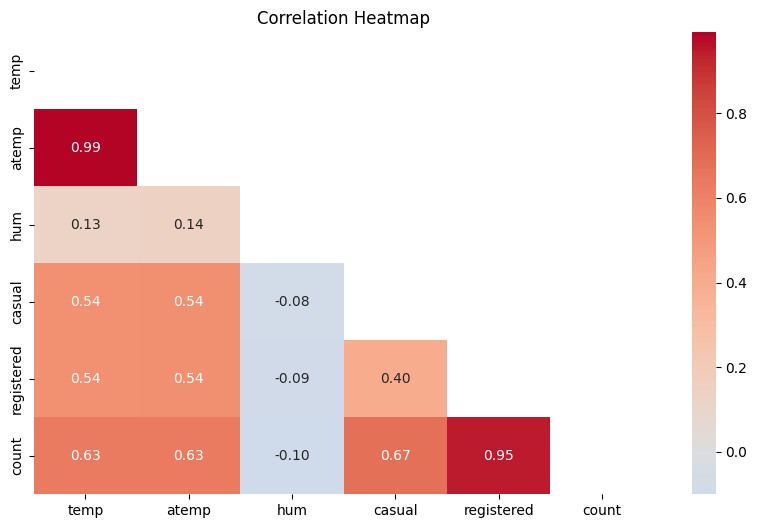

In [123]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:

- atemp dan temp sangat berkorelasi (0.99).
- hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
- casual cukup berkorelasi dengan temp dan atemp (0.54), dan sedikit negatif dengan hum (-0.08).
- registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).
- count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

**Insight**

- Bulan dengan rata-rata jumlah penyewaan sepeda terbesar adalah `Juni`, sedangkan bulan dengan rata-rata dan jumlah penyewaan terkecil adalah `Januari`.
  
- Penyewaan sepeda paling sering terjadi saat cuaca `cerah` atau `mendung`, sangat sedikit saat `salju` turun, dan hampir tidak ada penyewaan saat cuaca sangat buruk.

- Urutan rata-rata jumlah penyewaan berdasarkan hari, dari yang terbesar hingga terkecil, adalah sebagai berikut: 
  `Jumat (Fri)`, `Kamis (Thu)`, `Sabtu (Sat)`, `Rabu (Wed)`, `Selasa (Tue)`, `Senin (Mon)`, dan `Minggu (Sun)`.

- Jumlah penyewaan sepeda terbesar terjadi pada `hari kerja (working day)` dibandingkan dengan `hari libur`. Meskipun perbedaannya tidak terlalu signifikan, penyewaan di hari kerja lebih dominan.

- Para penyewa, baik `Casual` maupun `Registered`, lebih aktif pada `musim gugur (Fall)`, sementara musim dengan penyewaan paling sedikit adalah `musim semi (Spring)`.

- Berdasarkan analisis pengelompokan suhu (`temp`), suhu yang dirasakan (`atemp`), dan kelembaban (`hum`) menurut musim, berikut kesimpulannya:
  - Rata-rata `suhu` dan `atemp` tertinggi terjadi pada `musim gugur (Fall)`, diikuti oleh `musim panas (Summer)`, `musim dingin (Winter)`, dan `musim semi (Spring)`.
  - Rata-rata `kelembaban (humidity)` tertinggi terjadi pada `musim dingin (Winter)`, diikuti oleh `musim gugur (Fall)`, `musim panas (Summer)`, dan terendah pada `musim semi (Spring)`.

- Berdasarkan analisis `heatmap`, berikut beberapa temuan utama:
  - `Atemp` dan `temp` memiliki korelasi yang sangat kuat (`0.99`).
  - `Kelembaban (hum)` memiliki korelasi lemah dengan `temp` dan `atemp` (masing-masing `0.13` dan `0.14`).
  - Penyewa `casual` memiliki korelasi sedang dengan `temp` dan `atemp` (`0.54`), serta sedikit negatif dengan `hum` (`-0.08`).
  - Penyewa `registered` memiliki pola korelasi yang mirip dengan `casual`, dengan korelasi moderat di antara keduanya (`0.40`).
  - Jumlah total penyewaan (`count`) berkorelasi kuat dengan `temp`, `atemp`, `casual`, dan `registered` (masing-masing `0.63`, `0.63`, `0.67`, dan `0.95`), serta sedikit negatif dengan `hum` (`-0.10`).


## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 1 : Apakah cuara berpengaruh terhadap jumlah pengguna sepeda?


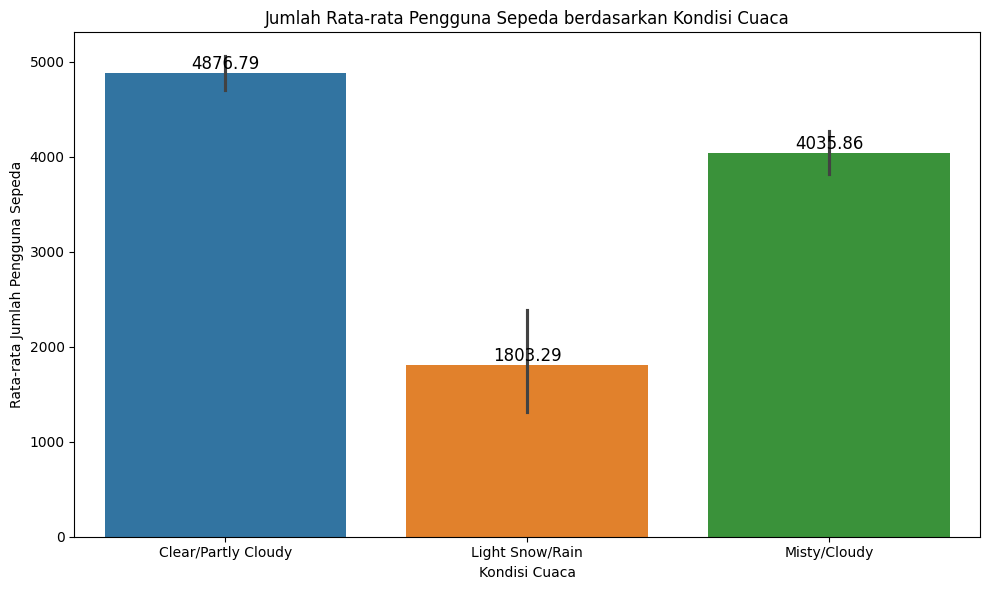

In [124]:
# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df,
    hue='weather_cond',  # Assigning 'weather_cond' as hue
    palette=["tab:blue", "tab:orange", "tab:green"]  # Color palette
)

# Setting titles and labels
plt.title('Jumlah Rata-rata Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')

# Add counts above each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',  # Use the height of the bar
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Pertanyaan 2 : Bagaimana tren penggunaan sepeda dalam tahun 2011 dan 2012 mana yang lebih unggul ?

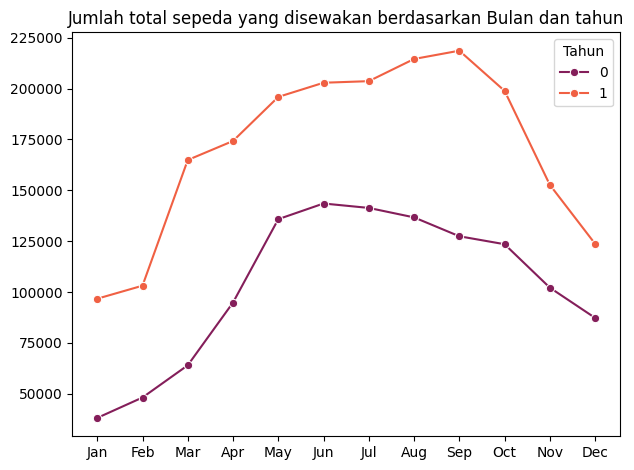

In [125]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Bagaimana pengaruh temp, atemp serta humidity

Text(0.5, 1.0, 'Humidity vs Count')

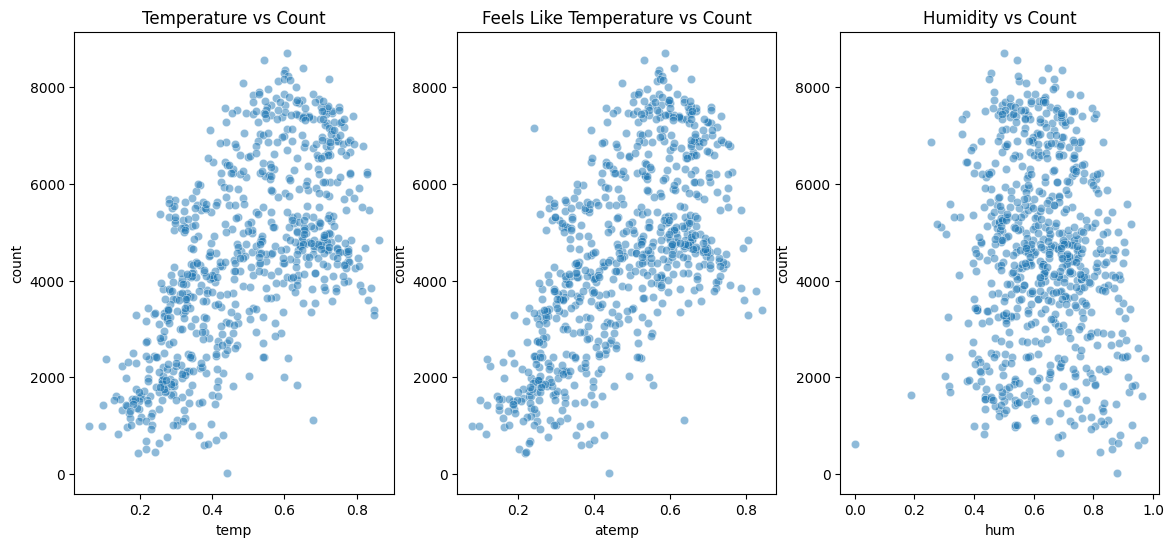

In [126]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='temp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Temperature vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='atemp',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Feels Like Temperature vs Count')

# Scatter plot untuk 'hum' vs 'count'
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='hum',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Humidity vs Count')

### Pertanyaan 4 : Apakah ada pengaruh musim terhadap penyewa sepeda baik Casual dan Registered ?

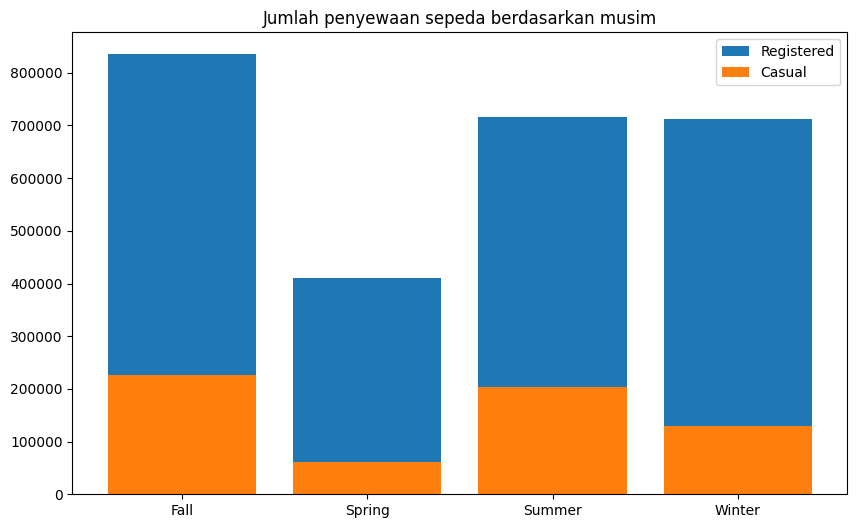

In [127]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

**Insight**

- Pertanyaan 1: Berdasarkan visualisasi data menggunakan `boxplot`, dapat disimpulkan bahwa terdapat hubungan yang jelas antara kondisi cuaca dan penyewa sepeda. Kondisi cuaca saat `cerah` atau `setengah mendung` menjadi yang paling diminati, diikuti oleh cuaca `berkabut/mendung`, sementara kondisi cuaca `sedikit bersalju/hujan` menjadi yang paling sedikit diminati.

- Pertanyaan 2: Berdasarkan visualisasi di atas menggunakan `lineplot`, dapat disimpulkan bahwa tahun `2012` (yang diwakili oleh angka 1) jelas unggul baik dari Januari hingga Desember. Puncak penyewaan sepeda pada tahun 2012 terjadi pada bulan `September`, sementara bulan yang paling sepi adalah `Januari`. Di sisi lain, pada tahun `2011`, puncak penyewaan sepeda terjadi pada bulan `Juni`, dengan bulan `Januari` sebagai bulan dengan penyewaan terendah.

- Pertanyaan 3: Berdasarkan hasil analisis di atas menggunakan `scatter plot`, dapat ditarik pernyataan sebagai berikut:
    - Hubungan antara `temp` dan `count` menunjukkan korelasi positif antara dua variabel.
    - Hubungan antara `atemp` dan `count` juga menunjukkan korelasi positif antara kedua variabel.
    - Hubungan antara `hum` dan `count` menunjukkan korelasi sedikit negatif, tetapi tidak terlalu signifikan, karena kecenderungan ke kiri tidak terlalu nampak.

      Kesimpulannya, jika temperatur (`temp` dan `atemp`) meningkat, maka pengguna sepeda juga cenderung meningkat. Pengaruh kelembaban (`humidity`) sepertinya sangat kecil di sini, meskipun cenderung dapat menurunkan jumlah pengguna sepeda.

- Pertanyaan 4: Berdasarkan hasil analisis di atas menggunakan `barplot`, dapat disimpulkan bahwa di semua musim, musim yang paling dinikmati oleh para pengguna sepeda (baik `Casual` maupun `Registered`) adalah `musim gugur (Fall)`, diikuti oleh `musim panas (Summer)`, `musim dingin (Winter)`, dan diakhiri dengan `musim semi (Spring)`.


## Conclusion

**Conclusion**

- Kesimpulan Pertanyaan 1: Dapat terlihat jelas terdapat hubungan di antara keduanya. Para penyewa sepeda sangat menyukai cuaca `Cerah/Sedikit mendung` dengan `Q3` di atas 6000, `Q1` kurang dari 4000, serta mediannya hampir 5000. Posisi kedua ditempati oleh cuaca `Berkabut/Mendung` dengan `Q3` di atas 5000, `Q1` di bawah 3000, dan mediannya di atas 4000. Terakhir, pengguna kurang menyukai cuaca `Sedikit bersalju/Hujan` dengan `Q3` di atas 2000, `Q1` di bawah 1000, dan mediannya di atas 1000. Tidak ada data untuk kondisi cuaca `Badai Besar`, karena memang tidak memungkinkan untuk bersepeda dalam kondisi tersebut.

- Kesimpulan Pertanyaan 2: Pada visualisasi kali ini, dapat kita amati perbedaan puncak dan dasar bulan pada kedua tahun, yakni `2011` dan `2012`. Puncak pada tahun 2011 terjadi pada bulan `Juni`, dan dasar pada bulan `Januari`. Sebaliknya, puncak tahun 2012 ada pada bulan `September`, dengan dasar yang sama yaitu bulan `Januari`. Dari kedua visualisasi tersebut, terlihat bahwa jumlah total sepeda yang disewakan pada tahun 2012 secara keseluruhan lebih tinggi dibandingkan dengan tahun 2011.

- Kesimpulan Pertanyaan 3: Dari tiga visualisasi yang ditampilkan, dapat disimpulkan bahwa `temp` dan `atemp` memiliki korelasi positif dengan `count`. Artinya, jika temperatur (`temp` dan `atemp`) meningkat, maka jumlah pengguna sepeda juga cenderung meningkat. Sebaliknya, `Humidity` memiliki korelasi negatif dengan `count`, meskipun sangat minim (tidak terlalu signifikan), tetapi tetap dapat menurunkan jumlah pengguna sepeda ketika kelembaban meningkat.

- Kesimpulan Pertanyaan 4: Pada visualisasi terakhir, hasil yang didapat cukup mengejutkan, di mana musim `Dingin (Winter)` tidak menjadi musim terakhir, melainkan musim `Semi (Spring)`. Hal ini bisa dipengaruhi oleh banyak faktor, seperti kondisi cuaca, temperatur udara, hari kerja, hari libur, dan lain-lain. Sementara itu, urutan pertama ditempati oleh musim `Gugur (Fall)`, yang mampu meraih penyewaan sepeda sebanyak lebih dari 800,000.


### OPTIONAL ANALISIS LANJUTAN RFM

Penerapan RFM kali ini bertujuan untuk Mengidentifikasi Segmen Pelanggan yaitu dengan mengelompokkan pelanggan berdasarkan recency, frecuency, dan monetary  untuk memahami perilaku pelanggan yang nantinya dapat diidentifikan lebih lanjut

1. Analisis RFM (Recency, Frequency dan Monetary)
- Data pengguna terdaftar diambil dari day_df, dengan kolom registered dan dateday. Kolom count diisi dengan jumlah penyewaan terdaftar.

In [46]:
# Menghitung Recency
snapshot_date = day_df['dateday'].max() + pd.DateOffset(days=1)  # Tanggal snapshot adalah tanggal terakhir + 1
day_df['Recency'] = (snapshot_date - day_df['dateday']).dt.days

# Menghitung Frequency
frequency_df = day_df.groupby('registered').agg(Frequency=('count', 'sum')).reset_index()

# Menghitung Monetary (dianggap sama dengan Frequency)
monetary_df = frequency_df.copy()
monetary_df.rename(columns={'Frequency': 'Monetary'}, inplace=True)

# Menggabungkan RFM
rfm_result = frequency_df.merge(monetary_df, on='registered')
rfm_result = rfm_result.merge(day_df[['registered', 'Recency']].drop_duplicates(), on='registered')

# Mengelompokkan RFM
rfm_result['R'] = pd.qcut(rfm_result['Recency'], 4, labels=[4, 3, 2, 1])  # 1: paling baru
rfm_result['F'] = pd.qcut(rfm_result['Frequency'], 4, labels=[1, 2, 3, 4])  # 4: paling sering
rfm_result['M'] = pd.qcut(rfm_result['Monetary'], 4, labels=[1, 2, 3, 4])  # 4: paling banyak

# Menghitung skoring akhir
rfm_result['RFM_Score'] = rfm_result['R'].astype(str) + rfm_result['F'].astype(str) + rfm_result['M'].astype(str)

# Tampilkan hasil RFM
print(rfm_result[['registered', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']])

     registered  Recency  Frequency  Monetary RFM_Score
0            20       64         22        22       411
1           416      705        431       431       111
2           432        6        441       441       411
3           451      373        754       754       211
4           472      706        506       506       111
..          ...      ...        ...       ...       ...
726        6844       90       7572      7572       444
727        6898       69       7693      7693       444
728        6911       83       7691      7691       444
729        6917      102       8167      8167       444
730        6946       97       7733      7733       444

[731 rows x 5 columns]


Disini kita sudah mendapatkan hasil analisis RFM, yang mana ada satu hal menarik yaitu, monetary tidak ada dalam dataset maka kita anggap sama dengan Frequency

2. Grouping RFM for RFM Score & Visualize
- Mengelompokkan RFM dan menampilkan visualisasinya agar mudah dipahami untuk analisis lebih lanjut

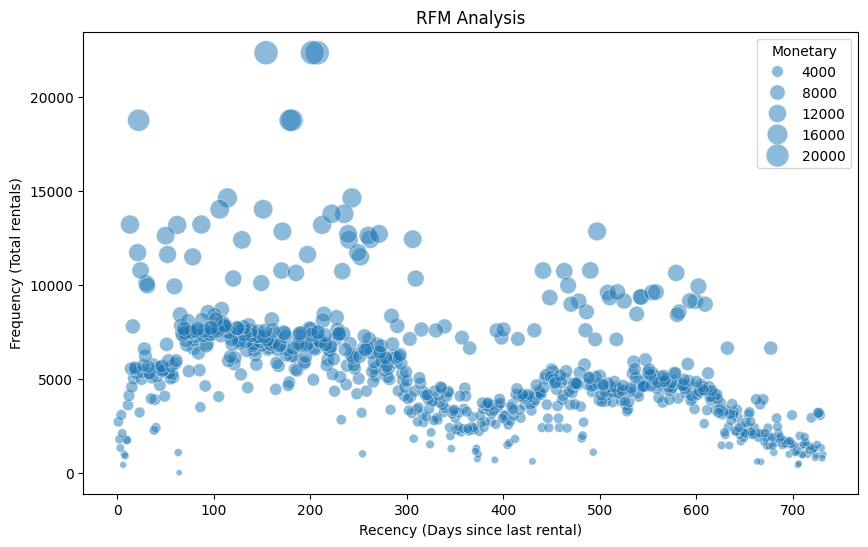

In [47]:
# Visualisasi RFM dengan Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency',
    y='Frequency',
    size='Monetary',
    sizes=(20, 300),
    data=rfm_result,
    alpha=0.5
)

plt.title('RFM Analysis')
plt.xlabel('Recency (Days since last rental)')
plt.ylabel('Frequency (Total rentals)')
plt.show()

Pada visualisasi diatas, dapat dilihat bahwa secara umum, pelanggan yang baru-baru ini bertransaksi dan sering melakukan pembelian adalah target utama untuk strategi retensi, sementara pelanggan dengan Recency yang lebih besar mungkin membutuhkan strategi agar mengunjungi kembali.

**Kesimpulan RFM Analysis**

- *Pelanggan Bernilai Tinggi*:
    Pengguna dengan nilai `Frequency`, `Monetary`, dan `RFM Score` tinggi, seperti ID 726 hingga 730, adalah pelanggan dengan kontribusi ekonomi yang signifikan. Mereka sering berinteraksi dengan perusahaan dan dapat dikategorikan sebagai `pelanggan loyal`. Pelanggan ini harus diprioritaskan dalam upaya `retensi pelanggan`, seperti memberikan program loyalitas atau penawaran eksklusif.

- *Pelanggan Bernilai Rendah*:
    Pengguna dengan nilai `Frequency` dan `Monetary` rendah, seperti ID 0, menunjukkan bahwa mereka jarang berinteraksi dengan perusahaan dan memiliki kontribusi yang lebih kecil. Strategi pemasaran yang tepat, seperti `kampanye reaktivasi`, dapat digunakan untuk mendorong pelanggan ini untuk kembali terlibat dengan produk atau layanan.

- *Kedekatan Waktu (Recency)*:
    Pengguna dengan nilai `Recency` kecil, seperti ID 2 dengan nilai `Recency` sebesar 5, menunjukkan bahwa mereka baru-baru ini melakukan transaksi. Hal ini menunjukkan bahwa pelanggan tersebut berada dalam fase `aktif`, dan promosi yang relevan atau penawaran khusus dapat membantu meningkatkan keterlibatan dan menjaga mereka tetap aktif.

**Rekomendasi**
- `Pelanggan Loyal`: Fokus pada menjaga hubungan dengan pelanggan bernilai tinggi melalui program retensi yang lebih personal.
- `Pelanggan Tidak Aktif`: Lakukan strategi pemasaran yang difokuskan pada reaktivasi pelanggan bernilai rendah untuk meningkatkan kembali frekuensi dan nilai transaksi mereka.
- `Pelanggan Baru Aktif`: Berikan promosi yang relevan kepada pelanggan yang baru saja melakukan transaksi untuk menjaga mereka tetap terlibat dengan perusahaan.

Analisis ini dapat membantu dalam mengelompokkan pelanggan berdasarkan perilaku mereka sehingga perusahaan dapat menargetkan segmen yang tepat dengan strategi yang efektif.
